# Pandas Data Analysis Assignment - Custom Data Sets

### Nate Tyler
### 4/8/25

## Objective
In this assignment, you will work with a real-world dataset of your choosing and continue to grow your skills in data analysis using pandas.

Below are some of the packages that you can utilize (pandas being required). These are linked to the documentation for your reference.

[Pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)\
[Numpy](https://numpy.org/doc/)\
[Matplotlib](https://matplotlib.org/stable/index.html)\
[seaborn](https://seaborn.pydata.org/index.html)


## Data Source

First of all, please select a dataset for this assignment from online. There are suggested sources in the dataset ipynb file I've provided.


In [21]:
# Import packages used. You may have to pip install some of these. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import the dataset. 
df = pd.read_csv('modern_RAPTOR_by_player.csv')

# Load the dataset as a dataframe


# Display first 10 rows of your dataset.
print(df.head(10))

        player_name  player_id  season  poss    mp  raptor_box_offense  \
0      Alex Abrines  abrinal01    2017  2387  1135            0.745505   
1      Alex Abrines  abrinal01    2018  2546  1244            0.317549   
2      Alex Abrines  abrinal01    2019  1279   588           -3.215683   
3  Precious Achiuwa  achiupr01    2021  1581   749           -4.122966   
4  Precious Achiuwa  achiupr01    2022  3802  1892           -2.521510   
5        Quincy Acy    acyqu01    2014  1716   847           -1.716079   
6        Quincy Acy    acyqu01    2015  2517  1287           -2.014956   
7        Quincy Acy    acyqu01    2016  1852   876           -0.008328   
8        Quincy Acy    acyqu01    2017  1169   558           -0.129002   
9        Quincy Acy    acyqu01    2018  2856  1359           -2.620032   

   raptor_box_defense  raptor_box_total  raptor_onoff_offense  \
0           -0.372938          0.372567             -0.418553   
1           -1.725325         -1.407776             -1.

## Data Cleaning & Exploration

In [22]:
# Analyze your data (show in outputs) and clean the data as is appropriate.
print(df.shape)
df.info()
null_count = df.isnull().sum()
print(null_count)


(4685, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4685 entries, 0 to 4684
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_name           4685 non-null   object 
 1   player_id             4685 non-null   object 
 2   season                4685 non-null   int64  
 3   poss                  4685 non-null   int64  
 4   mp                    4685 non-null   int64  
 5   raptor_box_offense    4684 non-null   float64
 6   raptor_box_defense    4684 non-null   float64
 7   raptor_box_total      4684 non-null   float64
 8   raptor_onoff_offense  4684 non-null   float64
 9   raptor_onoff_defense  4684 non-null   float64
 10  raptor_onoff_total    4684 non-null   float64
 11  raptor_offense        4685 non-null   float64
 12  raptor_defense        4685 non-null   float64
 13  raptor_total          4685 non-null   float64
 14  war_total             4685 non-null   float64
 15  war_reg_se

In [23]:
df_clean = df.dropna(subset=['raptor_total', 'mp', 'poss', 'pace_impact', 'war_total'])
Min_minutes = 500 
df_clean = df_clean[df_clean['mp'] >= Min_minutes]

In [24]:
# Tell me about the data after you've cleaned it up. Show what data types are in the dataset, also show how many rows and columns are in the data set.
# 
# Ive just dropped all the null values in what I have determined as key columns, Im trying to find the most efficent player.So the raptor total is total effect per 100 possesions (both office and defense)
#MP = Minutes played
#Lastly, I limited the analysis for players with 500 minutes and over played, because if you played 2 minutes and 2 points you would look crazy efficient and skew our analysis  

## Data Manipulation

In [25]:
# Add at least two additional features to your data (additional calculated columns) to be used in your analysis.
df_clean['avg_minutes_per_game'] = df_clean['mp'] / (df_clean['poss'] / 100) #average minutes per game
df_clean['pace_adjusted_raptor'] = df_clean['raptor_total'] / (1 + df_clean['pace_impact']) # how the player affects pace of game
df_clean['raptor_per_minute'] = df_clean['raptor_total'] / df_clean['mp'] #raptor per minute
df_clean['war_per_minute'] = df_clean['war_total'] / df_clean['mp'] 

most_efficient = df_clean.loc[df_clean['raptor_per_minute'].idxmax()]
war_best = df_clean.loc[df_clean['war_per_minute'].idxmax()]
pace_guy = df_clean.loc[df_clean['pace_adjusted_raptor'].idxmax()]

print(most_efficient)
print(war_best)
print(pace_guy)

player_name             Alex Caruso
player_id                 carusal01
season                         2019
poss                           1135
mp                              531
raptor_box_offense         2.147172
raptor_box_defense           2.6888
raptor_box_total           4.835972
raptor_onoff_offense      -1.056386
raptor_onoff_defense       5.793385
raptor_onoff_total         4.736999
raptor_offense             1.649427
raptor_defense             3.495627
raptor_total               5.145054
war_total                  2.151722
war_reg_season             2.151722
war_playoffs                    0.0
predator_offense           0.750971
predator_defense           2.594953
predator_total             3.345923
pace_impact                 0.61105
avg_minutes_per_game      46.784141
pace_adjusted_raptor       3.193602
raptor_per_minute          0.009689
war_per_minute             0.004052
Name: 794, dtype: object
player_name             Nikola Jokic
player_id                  jokicni01
s

## Data Analysis

In [26]:
# Perform your analysis here. Your analysis should thoughtful, and provide at least two insights that are not obvious when looking at the dataframe. 
print('\nMost Efficient Player:')
print(f"Name: {most_efficient['player_name']}")
print(f"Season: {most_efficient['season']}")
print(f"Minutes Played (mp): {most_efficient['mp']:.0f}")
print(f"Average Minutes per Game: {most_efficient['avg_minutes_per_game']:.2f}")
print(f"WAR per Minute: {most_efficient['war_per_minute']:.4f}")
print(f"Pace-Adjusted RAPTOR: {most_efficient['pace_adjusted_raptor']:.2f}")


Most Efficient Player:
Name: Alex Caruso
Season: 2019
Minutes Played (mp): 531
Average Minutes per Game: 46.78
WAR per Minute: 0.0041
Pace-Adjusted RAPTOR: 3.19


## Data Visualization

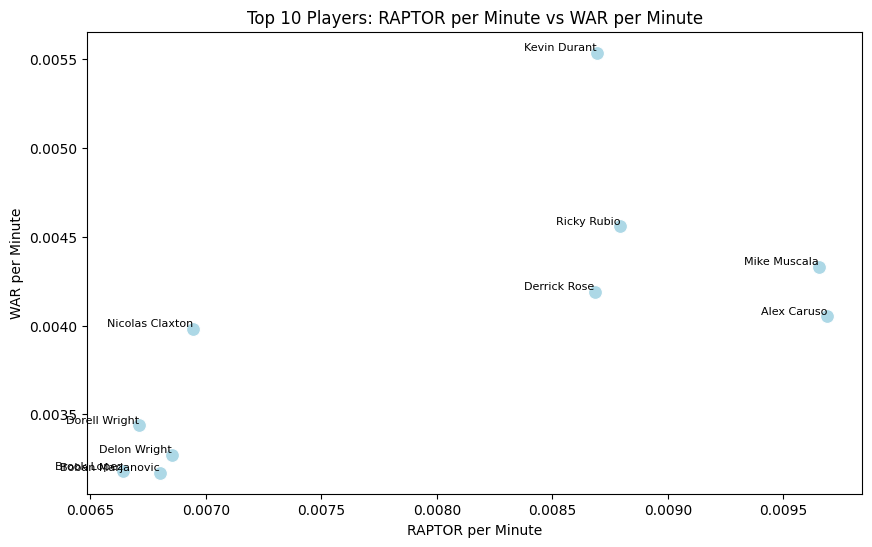

In [27]:
# Bolster your analysis with at least two visualizations.
#seaborn.scatterplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None, **kwargs)
top_10 = df_clean.sort_values('raptor_per_minute', ascending=False).head(10)

plt.figure(figsize=(10, 6))  # Slightly larger for name readability
sns.scatterplot(
    data=top_10,
    x='raptor_per_minute',
    y='war_per_minute',
    color='lightblue',
    s=100  # Point size
)
plt.title('Top 10 Players: RAPTOR per Minute vs WAR per Minute')
plt.xlabel('RAPTOR per Minute')
plt.ylabel('WAR per Minute')

# Add player names next to points
for i, row in top_10.iterrows():
    plt.text(row['raptor_per_minute'], row['war_per_minute'], 
             row['player_name'], fontsize=8, ha='right', va='bottom')

plt.show()

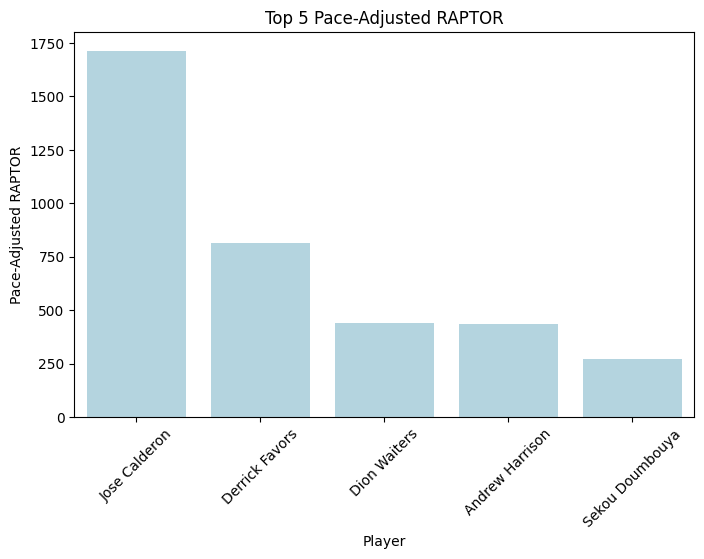

In [28]:
top_5_pace = df_clean.sort_values('pace_adjusted_raptor', ascending=False).head(5)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=top_5_pace,
    x='player_name',
    y='pace_adjusted_raptor',
    color='lightblue'
)
plt.title('Top 5 Pace-Adjusted RAPTOR')
plt.xlabel('Player')
plt.ylabel('Pace-Adjusted RAPTOR')
plt.xticks(rotation=45)

plt.show()

## Analysis

In the markdown block below, give me a written analysis of your code blocks above. This is the area to provide written responses to accompany your work in the Data Analysis and Data Visualization coding you did above. 

First I started by cleaning the data to drop null values, in this case I didnt want to fill in data or add means, because if a player was injured or didnt play a 0 would make guys with low minutes look more productive and guys with more minutes and production look worse.

I also limited the analysis for players with 500 minutes and over played, because if you played 2 minutes and 2 points you would look crazy efficient and skew our analysis  

I then made a scatter plot showing the top 10 players’ efficiency and value per minute, showing, Who’s best at impacting games. Names on the graph highlight standouts (KD, Alex Curuso). The bar chart zooms in on the top 5 for pace-adjusted performance, highlighting Who excels with game speed. As the game speeds up, guys like Jose Calderon get better. Together, they compare overall impact with pace strength. One thing I found interesting was that the pace leader isn’t in the scatter’s top 10, which means the pace skill might not translate to efficiency or value.

Overall I was surprised to see that Alex Caruso was the most efficent player and not someone like Luka, Lebron or James Harden.

## Grading Rubric

Grading overall will be on a 100-point scale. Everyone starts with 100, the final score will be determined based on point deductions related to the overall quality of your code and analysis. The expectation for code is that comments will be included as appropriate, the code is easy to read, efficient, and performs the tasks asked of you. Grading will be more lenient if you attempt more complex code or combinations of code (assuming it makes sense to do so). The analysis will be scored based on proper grammar (spelling, format, composition), and how practical and thoughtful it is. If you have any questions, think about the "cold reader" rule, "Would someone with basic knowledge of this subject matter be able to read through my work in one shot without a lot of questions?"

Lastly, while collaboration on theory and methods is encouraged, DO NOT share your code line for line with your classmates. Blatant and obvious copying of any parts of your assignment will lead to deductions. This is the time to really develop your individual and analysis styles. 


